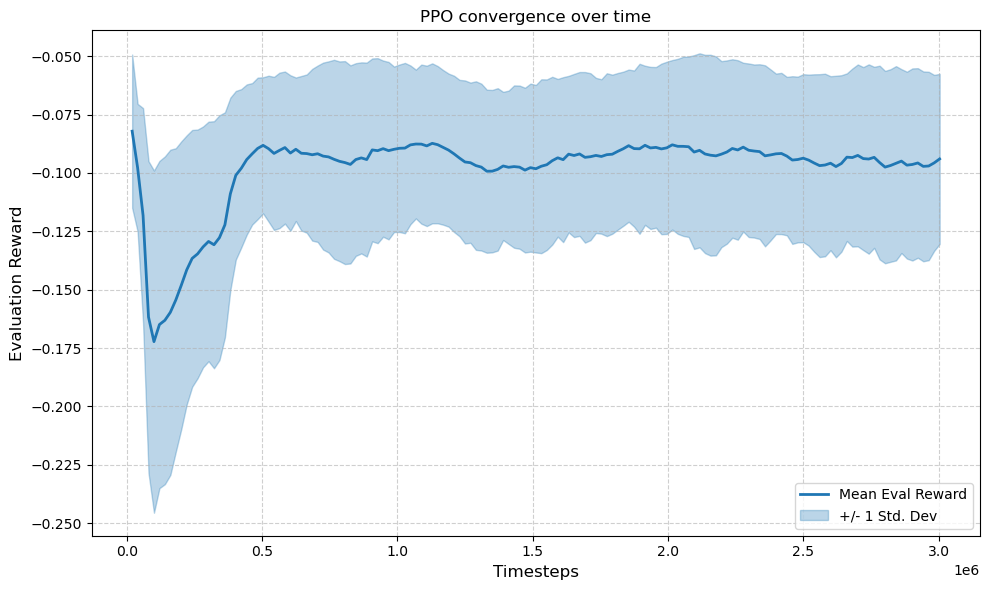

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = np.load('./logs/eval_logsBigO/ev/evaluations.npz')
timesteps = data['timesteps'].flatten()
mean_rewards = data['results'].mean(axis = 1)
std_rewards = (data['results']).std(axis = 1)

timesteps_s = pd.Series(timesteps)
mean_s = pd.Series(mean_rewards)
std_s = pd.Series(std_rewards)

mean_smoothed = mean_s.rolling(window = 15, min_periods=1).mean()
std_smoothed = std_s.rolling(window=15, min_periods=1).mean()

plt.figure(figsize=(10,6))
plt.plot(timesteps_s, mean_smoothed, label = 'Mean Eval Reward', linewidth = 2)
plt.fill_between(timesteps_s, mean_smoothed - std_smoothed, mean_smoothed + std_smoothed, alpha = 0.3, label = '+/- 1 Std. Dev', color = 'tab:blue')
plt.xlabel('Timesteps', fontsize = 12)
plt.ylabel('Evaluation Reward', fontsize = 12)
plt.title('PPO convergence over time')
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.legend()
plt.tight_layout()
plt.show()